In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import re
import string

In [28]:
df = pd.read_csv("document.csv")
df

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0
...,...,...
2220,India opens skies to competition\n \n India wi...,4
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4
2222,Survey confirms property slowdown\n \n Governm...,4
2223,High fuel prices hit BA's profits\n \n British...,4


In [7]:
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [8]:
df.tail()

,Text,Label
2220,India opens skies to competition\n \n India wi...,4
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4
2222,Survey confirms property slowdown\n \n Governm...,4
2223,High fuel prices hit BA's profits\n \n British...,4
2224,US trade gap hits record in 2004\n \n The gap ...,4


In [9]:
df.shape

(2225, 2)

In [10]:
df.describe()

,Label
count,2225.000000
mean,2.027416
std,1.438694
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [11]:
df.isnull().sum()

Text     0
Label    0
dtype: int64

In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text
df['Clean_Text'] = df['Text'].apply(clean_text)

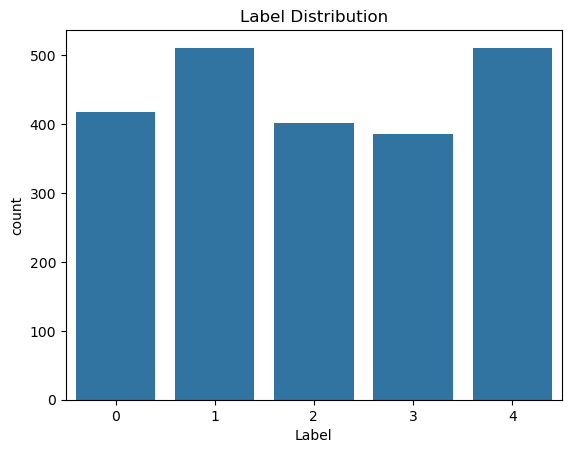

In [14]:
sns.countplot(data=df, x='Label')
plt.title('Label Distribution')
plt.show()

In [15]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['Clean_Text']).toarray()
y = df['Label']

In [16]:
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [19]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [20]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [29]:
print("\n--- Logistic Regression ---")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        92
           1       0.99      0.99      0.99        98
           2       0.97      0.95      0.96        77
           3       0.95      0.99      0.97        76
           4       0.98      0.97      0.98       102

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445

Confusion Matrix:
 [[87  1  1  1  2]
 [ 1 97  0  0  0]
 [ 2  0 73  2  0]
 [ 1  0  0 75  0]
 [ 1  0  1  1 99]]


In [31]:
print("\n--- Decision Tree ---")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.74      0.73      0.74        92
           1       0.89      0.88      0.88        98
           2       0.85      0.87      0.86        77
           3       0.81      0.82      0.81        76
           4       0.76      0.76      0.76       102

    accuracy                           0.81       445
   macro avg       0.81      0.81      0.81       445
weighted avg       0.81      0.81      0.81       445

Confusion Matrix:
 [[67  3  3  6 13]
 [ 5 86  0  1  6]
 [ 1  0 67  5  4]
 [ 3  4  6 62  1]
 [14  4  3  3 78]]


In [30]:
print("\n--- Support Vector Machine ---")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


--- Support Vector Machine ---
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        92
           1       0.99      0.98      0.98        98
           2       0.97      0.91      0.94        77
           3       0.96      0.97      0.97        76
           4       0.94      0.98      0.96       102

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445

Confusion Matrix:
 [[ 87   1   1   1   2]
 [  1  96   0   0   1]
 [  3   0  70   2   2]
 [  1   0   0  74   1]
 [  1   0   1   0 100]]


In [27]:
label_map = {
    0: 'business',
    1: 'entertainment',
    2: 'politics',
    3: 'sport',
    4: 'tech'
}
inv_label_map = {v: k for k, v in label_map.items()}

desired_category = input("Enter a category to display documents (business, entertainment, politics, sport, tech): ").strip().lower()
desired_label = inv_label_map.get(desired_category)

if desired_label is not None:
    print(f"\n--- Documents predicted as '{desired_category}' ---")
    count = 0
    for i in range(len(df)):
        predicted_label = svm_model.predict([X_scaled[i]])[0]
        if predicted_label == desired_label:
            print(f"Document {count+1}: {df['Text'].iloc[i][:120]}...")
            print(f"Predicted Category: {desired_category}")
            print("-")
            count += 1
            if count >= 10:
                break
else:
    print("Invalid category entered.")

Enter a category to display documents (business, entertainment, politics, sport, tech):  sport



--- Documents predicted as 'sport' ---
Document 1: BNP leader Nick Griffin arrested
 
 The leader of the British National Party has been arrested as part of a police inqui...
Predicted Category: sport
-
Document 2: Half-Life 2 sweeps Bafta awards
 
 PC first person shooter Half-Life 2 has won six Bafta Awards, including best game and...
Predicted Category: sport
-
Document 3: BBC leads interactive Bafta wins
 
 The BBC and the National Theatre have led the field at this year's Interactive Bafta...
Predicted Category: sport
-
Document 4: Super Size Me wins writers' award
 
 Super Size Me director Morgan Spurlock has won the Writers Guild of America's award...
Predicted Category: sport
-
Document 5: Mogul Wilson backing UK rap band
 
 Tony Wilson, the music mogul who established the influential Factory Records in the ...
Predicted Category: sport
-
Document 6: Police praise 'courageous' Ozzy
 
 Rock star Ozzy Osbourne has been praised by police for "very courageously" tackling a...
Pred